<a href="https://colab.research.google.com/github/Harshith-R-shetty/AyurVision/blob/main/Prakriti_ANN_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'prakriti-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4987049%2F8385141%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240512%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240512T085005Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D09cdaae8521c2403c707d338fa6203d39287a5f5eb215d7a14cabda359987503cdd9d8f80dd52f5159aa3c6c912689485a5e4479bd3145cf635c70dc3cfa9b3505114971e6e81a7964cead7e101e83ee6b54947c679bbe2e5b8d84a4e3cc5ed88232a478ea5d3c76683bce232c4c6930e65373e612d61cfb7e0d699102b260e7c65ad5aa1b2e1d185d17e47ccc3db2e240f6451ba718a05ba31273d7db48e6380d33204e4f85d7442e10b8d9acd1a500d0c273c53a498b3609770435cd07944512da1d64f502e23a62785c5a9fd8e1e4940a6fc7a9cedc1f8728cae090095b19cbf553ea71e115d39f5dedb80b797bd5c0d5ce6d305b5fbe57c02ae59415cff9,final-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4990192%2F8389746%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240512%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240512T085005Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Dabddb0cf3bc250c6e02ee2021d717199bd62f5ddf351947e4de20136843cd48c1a55ff5c5118b96cd0c7503764d603882e5091a3af81f3dd60db797cc987fa0bc09163b75ffc6d647f8d85fea2868120b9c120662a07181af6cf39e8ba28ab51ddd006e66dbaba028a9cd8f434eb1f0ecfae4abbb99fdaa74dacc55ba47cc8d64cf51e5056c784ce003ee2f355622a6dbd4bf979c566024e2fa3cb026c57247849850fa25d441476aa3e6675260a4b4849d7fe0903f661f0a702dfba2239a256f41f5fba2e8b5edf674212744e6470162992b4f8c2d9e234693e2638bc539e164645a41be250e4bcb899106b5226cfb2ea45f71da3a725b0eda66cff5d889eba'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [75]:
import pandas as pd
import numpy as np

In [76]:
dataset = pd.read_csv('/kaggle/input/final-dataset/updated_data.csv')
dataset.head()

,Gender,bodyBuild_Size,bodyFrame_Breadth,hair_Nature,skin_Nature,skin_Color,weight_Changes,nails_color,nails_Length,nails_nature,...,bladder_Amount,bladder_Frequency,perspiration_Amount,stool_Consistency,mental_Power,physical_Power,Anger_Freq,Irritability_speed,speech_Argumentative,class
0,Male,Weaklydeveloped,Thin/Narrow,Normal,Dry,Whitish,Gainandloseeasily,Pink,Long,Non_Brittle,...,Medium,Regular,Medium,Medium,Grade1,Grade2,Good,Quickly,Non_Argumentative,Vata
1,Male,Welldeveloped,Broad,Seasonal/Variable,Normal,Whitish,Gainandloseeasily,Reddish,Long,Non_Brittle,...,Medium,Regular,Medium,Medium,Grade2,Grade3,Poor,Slowly,Non_Argumentative,Kapha
2,Male,Weaklydeveloped,Thin/Narrow,Normal,Dry,Whitish,Difficultyingaining,Pink,Medium,Non_Brittle,...,Medium,Regular,Medium,Hard,Grade1,Grade2,Poor,Moderately,Non_Argumentative,Vata
3,Male,Weaklydeveloped,Thin/Narrow,Dry,Dry,FairPaleYellow,Difficultyingaining,Pink,Long,Non_Brittle,...,Medium,Regular,Medium,Hard,Grade1,Grade1,Medium,Quickly,Non_Argumentative,Vata
4,Male,Welldeveloped,Broad,Normal,Normal,Dark,Gaineasilyandlosewithdifficulty,Pink,Medium,Non_Brittle,...,Medium,Regular,Medium,Medium,Grade2,Grade3,Good,Moderately,Non_Argumentative,Kapha


In [77]:
def print_unique_values():
    for column in dataset:
        print(f'{column}:\t\t {dataset[column].unique()}')
print_unique_values()

Gender:		 ['Male' 'Female']
bodyBuild_Size:		 ['Weaklydeveloped' 'Welldeveloped' 'Moderatelydeveloped']
bodyFrame_Breadth:		 ['Thin/Narrow' 'Broad' 'Medium']
hair_Nature:		 ['Normal' 'Seasonal/Variable' 'Dry' 'Oily']
skin_Nature:		 ['Dry' 'Normal' 'Oily' 'Seasonal/Variable']
skin_Color:		 ['Whitish' 'FairPaleYellow' 'Dark' 'FairReddish' 'FairPink']
weight_Changes:		 ['Gainandloseeasily' 'Difficultyingaining'
 'Gaineasilyandlosewithdifficulty' 'Stable']
nails_color:		 ['Pink' 'Reddish' 'PaleYellow']
nails_Length:		 ['Long' 'Medium' 'Tooshort/TooLong']
nails_nature:		 ['Non_Brittle' 'Brittle']
teeth_Color:		 ['MilkyWhite' 'Yellowish' 'Dull/Blackish']
teeth_Shape:		 ['Regular' 'Irregular' nan]
teeth_Size:		 ['Medium' 'Large' 'TooSmall' 'TooLarge']
recalling_speed:		 ['Moderately' 'Slowly' 'Variably' 'Quickly']
memorizing_speed:		 ['Moderately' 'Quickly' 'Slowly' 'Variably']
working_Speed:		 ['Quick/Fast/Brisk' 'Medium' 'Slow' 'Variable']
sleep_Amount:		 ['Medium' 'High' 'Low' 'Variable']


In [78]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_encoded = dataset.apply(le.fit_transform)

data_encoded.head()

,Gender,bodyBuild_Size,bodyFrame_Breadth,hair_Nature,skin_Nature,skin_Color,weight_Changes,nails_color,nails_Length,nails_nature,...,bladder_Amount,bladder_Frequency,perspiration_Amount,stool_Consistency,mental_Power,physical_Power,Anger_Freq,Irritability_speed,speech_Argumentative,class
0,1,1,2,1,0,4,1,1,0,1,...,2,1,2,2,0,1,0,1,1,2
1,1,2,0,3,1,4,1,2,0,1,...,2,1,2,2,1,2,2,2,1,0
2,1,1,2,1,0,4,0,1,1,1,...,2,1,2,0,0,1,2,0,1,2
3,1,1,2,0,0,1,0,1,0,1,...,2,1,2,0,0,0,1,1,1,2
4,1,2,0,1,1,0,2,1,1,1,...,2,1,2,2,1,2,0,0,1,0


In [79]:
X=data_encoded.iloc[:,:-1].values
y=data_encoded.iloc[:,-1].values

print(X.shape)

(147, 48)


In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [88]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

model = Sequential([
    Dense(48,input_shape=(48,), activation='relu'),
    Dense(20, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
4/4 [==============================] - 3s 7ms/step - loss: 1.0845 - accuracy: 0.4216
Epoch 2/50
4/4 [==============================] - 0s 6ms/step - loss: 1.0228 - accuracy: 0.4804
Epoch 3/50
4/4 [==============================] - 0s 7ms/step - loss: 1.0115 - accuracy: 0.4412
Epoch 4/50
4/4 [==============================] - 0s 7ms/step - loss: 0.9563 - accuracy: 0.5392
Epoch 5/50
4/4 [==============================] - 0s 8ms/step - loss: 0.9525 - accuracy: 0.5196
Epoch 6/50
4/4 [==============================] - 0s 5ms/step - loss: 0.9097 - accuracy: 0.5392
Epoch 7/50
4/4 [==============================] - 0s 6ms/step - loss: 0.8889 - accuracy: 0.5686
Epoch 8/50
4/4 [==============================] - 0s 7ms/step - loss: 0.8533 - accuracy: 0.5588
Epoch 9/50
4/4 [==============================] - 0s 6ms/step - loss: 0.8461 - accuracy: 0.5784
Epoch 10/50
4/4 [==============================] - 0s 6ms/step - loss: 0.7924 - accuracy: 0.5588
Epoch 11/50
4/4 [======================

In [89]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.4057 - accuracy: 0.9556


[0.40573301911354065, 0.9555555582046509]

In [90]:
y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred, axis=1)

2/2 [==============================] - 0s 5ms/step


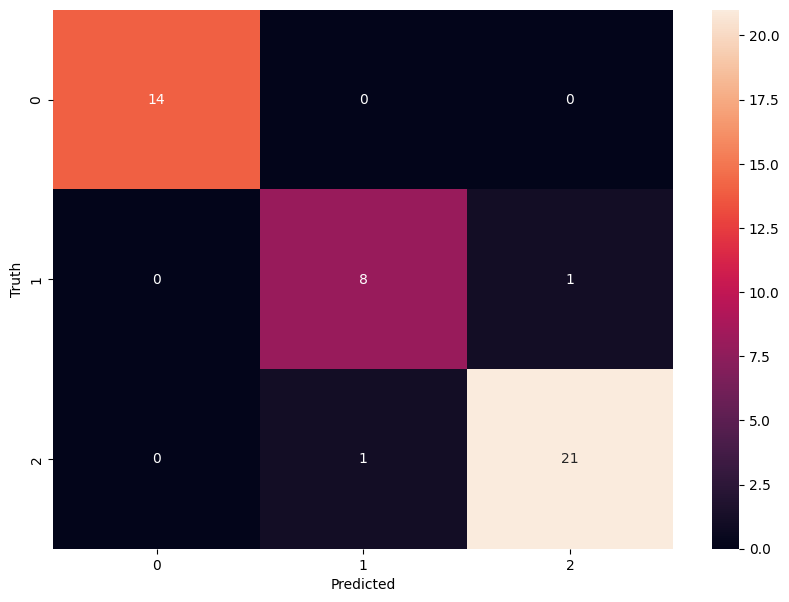

In [91]:
import seaborn as sn
import tensorflow as tf
import matplotlib.pyplot as plt
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()